In [2]:
import numpy as np
import patsy as pt
from patsy.contrasts import Treatment
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import seaborn as sns
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
%matplotlib inline

In [3]:
url = '/Users/VishalDubey/Vishal/College/polsci189fs/FF Project/train75.csv'
df = pd.read_csv(url)
data = df
data.head()

,l_names,l_team18,l_pos18,l_gp18,l_points18,draft_pick,cost,l_team17,l_pos17,l_gp17,...,pick17,cost17,off_linefo18,off_linepff18,off_passydsg17,off_runydsg17,off_ptsg17,def_ydsg17,def_ptsg17,train
0,Brandon LaFell,Oak,WR,6,46.000000,NaN,NaN,Cin,WR,16.0,...,228.0,2.0,13,7,226.89999,97.099998,18.799999,350.10001,23.299999,0.868933
1,Lance Kendricks,NE,TE,16,47.330002,NaN,NaN,GB,TE,16.0,...,NaN,NaN,3,11,276.10001,118.100000,28.600000,366.00000,18.500000,0.555103
2,Cody Kessler,Phi,QB,5,47.660000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,19,1,233.60001,132.200000,28.600000,306.50000,18.400000,0.875991
3,James O'Shaughnessy,Jax,TE,14,48.270000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21,15,224.60001,141.399990,26.100000,286.10001,16.799999,0.892759
4,D.J. Chark Jr.,Jax,WR,11,48.400002,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21,15,224.60001,141.399990,26.100000,286.10001,16.799999,0.584466


In [4]:
data.describe()

,l_gp18,l_points18,draft_pick,cost,l_gp17,l_points17,l_owners17,l_project17,l_actual17,l_passyds17,...,pick17,cost17,off_linefo18,off_linepff18,off_passydsg17,off_runydsg17,off_ptsg17,def_ydsg17,def_ptsg17,train
count,171.000000,171.000000,90.000000,90.000000,119.000000,119.000000,122.000000,122.000000,122.000000,117.000000,...,82.000000,82.00000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,13.444444,157.336492,99.400000,18.866667,13.336134,156.424033,0.494098,428.516393,245.778689,232.478632,...,104.939024,18.54878,15.988304,16.432749,220.116372,111.870175,21.486550,334.105268,21.710526,0.761444
std,3.128824,93.443599,67.594595,18.126398,3.712730,90.705809,0.418807,691.928163,214.958866,825.844892,...,68.596215,15.75989,9.304008,9.149084,30.885898,15.210753,4.082257,24.934733,2.708941,0.132216
min,4.000000,46.000000,1.000000,1.000000,1.000000,3.130000,0.000000,1.000000,1.000000,0.000000,...,3.000000,1.00000,1.000000,1.000000,175.700000,76.300003,14.600000,275.899990,15.800000,0.502767
25%,12.000000,87.334999,36.500000,3.000000,12.000000,89.235001,0.060000,56.000000,102.250000,0.000000,...,44.000000,4.00000,9.000000,8.500000,196.300000,103.800000,18.400000,318.399990,19.850001,0.664764
50%,15.000000,133.470000,85.500000,15.000000,15.000000,141.570010,0.455000,128.500000,204.500000,0.000000,...,99.000000,16.00000,15.000000,16.000000,220.899990,111.800000,20.900000,335.700010,22.299999,0.754243
75%,16.000000,207.214995,156.750000,30.000000,16.000000,220.954995,0.957500,241.250000,301.750000,0.000000,...,163.250000,28.00000,23.500000,24.000000,245.300000,122.200000,24.700001,352.299990,23.900000,0.871857
max,16.000000,427.769990,223.000000,67.000000,16.000000,441.030000,1.000000,1967.000000,850.000000,3804.000000,...,228.000000,60.00000,32.000000,32.000000,276.899990,141.399990,29.900000,378.100010,27.299999,0.999751


In [5]:

dummyCols=pd.get_dummies(data.l_pos17)
data = pd.concat([data, dummyCols], axis=1)
data['owners2'] = data.l_owners17**2
data['rec2'] = data.l_rectd17**2
data['pass2'] = data.l_passtd17**2
data['rush2'] = data.l_rushtd17**2


In [6]:
#vals = ['l_gp17', 'l_points17', 'l_owners17', 'l_project17', 'l_actual17', 'l_passtd17', 'l_passint17', 'l_rushyds17', 'l_rushtd17', 'l_recepts17', 'l_recyds17', 'l_rectd17', 'off_linefo18', 'off_linepff18', 'off_passydsg17', 'off_runydsg17', 'off_ptsg17']
#vals = ['WR', 'RB', 'TE', 'QB','l_gp17', 'l_points17', 'l_owners17', 'l_project17', 'l_actual17', 'l_recepts17', 'l_recyds17', 'l_rectd17', 'l_rec1st17', 'l_passtd17', 'l_passint17', 'l_passyds17', 'l_rushyds17', 'l_rushtd17', 'l_rush1st17', 'l_recepts17', 'l_recyds17', 'l_rectd17',  'off_linefo18', 'off_linepff18', 'off_passydsg17', 'off_runydsg17', 'off_ptsg17']
vals = ['l_actual17', 'l_points17', 'l_owners17', 'l_passtd17', 'l_passint17', 'l_rushyds17', 'l_rushtd17', 'l_recepts17', 'l_recyds17', 'l_rectd17']


In [7]:
ls = []
for i in range(len(vals)):
    st = data[vals[i]].isna()
    for j in range(len(st)):
        if(st[j] and (j not in ls)):
            ls.append(j)
data = data.drop(ls)

In [8]:
data.shape

(113, 46)

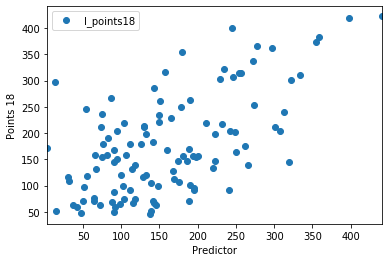

In [9]:
data.plot(x='l_points17', y='l_points18', style='o')  
plt.xlabel('Predictor')  
plt.ylabel('Points 18')  
plt.show()

In [10]:
data.head()

,l_names,l_team18,l_pos18,l_gp18,l_points18,draft_pick,cost,l_team17,l_pos17,l_gp17,...,def_ptsg17,train,QB,RB,TE,WR,owners2,rec2,pass2,rush2
0,Brandon LaFell,Oak,WR,6,46.000000,NaN,NaN,Cin,WR,16.0,...,23.299999,0.868933,0,0,0,1,0.0001,9.0,0.0,0.0
1,Lance Kendricks,NE,TE,16,47.330002,NaN,NaN,GB,TE,16.0,...,18.500000,0.555103,0,0,1,0,0.0000,1.0,0.0,0.0
9,Cody Latimer,NYG,WR,6,49.970001,NaN,NaN,NYG,WR,11.0,...,24.299999,0.931935,0,0,0,1,0.0000,4.0,0.0,0.0
12,Luke Stocker,Atl,TE,16,52.000000,NaN,NaN,Ten,TE,12.0,...,19.700001,0.745967,0,0,1,0,0.0000,1.0,0.0,0.0
13,Deonte Thompson,NYJ,WR,13,52.430000,NaN,NaN,Dal,WR,16.0,...,23.900000,0.716716,0,0,0,1,0.0001,4.0,0.0,0.0


In [11]:
data.shape

(113, 46)

In [12]:
X = data[vals].values
y = data['l_points18'].values

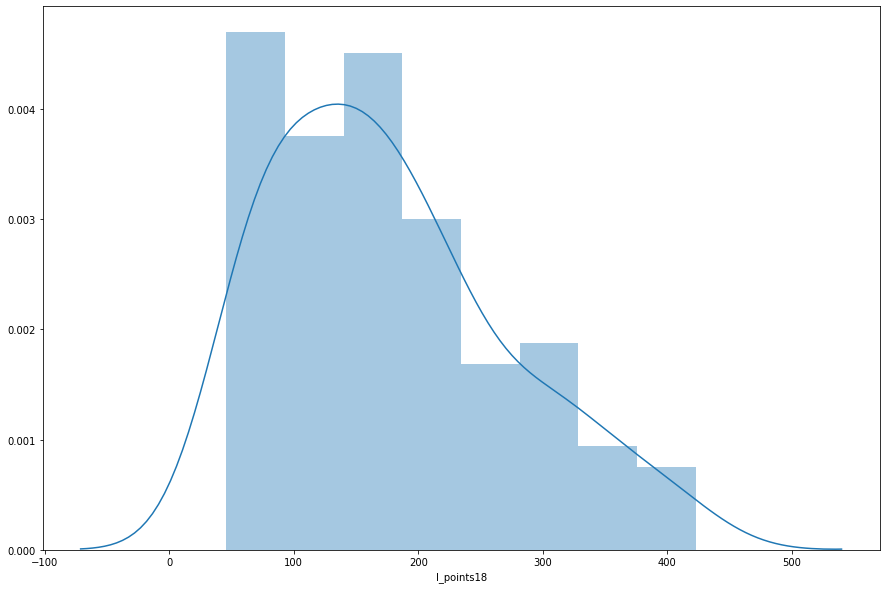

In [13]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['l_points18'])

In [33]:
def mse(y, y_bar):
    summation = 0
    n = len(y)
    for i in range (0,n):
        difference = y[i] - y_bar[i]
        squared_difference = difference**2
        summation = summation + squared_difference
    MSE = summation/n
    return MSE

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [35]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [36]:
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

training score: 0.43530158445396033
test score:  0.5688269578516079
number of features used:  9


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001)
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

err = mse(y_test, lasso.predict(X_test))
print("{}: {}\n{}: {}".format("MSE", err, "RMSE", math.sqrt(err)))
pd.Series(lasso.coef_, index=vals)

training score for alpha=0.01: 0.4368220905748097
test score for alpha =0.01:  0.5742897443116027
number of features used: for alpha =0.01: 10
training score for alpha=0.0001: 0.43682226667733126
test score for alpha =0.0001:  0.5743064003537318
number of features used: for alpha =0.0001: 10
MSE: 3213.724113232207
RMSE: 56.68971787927866


l_actual17      0.014661
l_points17      1.420065
l_owners17     63.370127
l_passtd17     -6.883892
l_passint17    -1.746611
l_rushyds17    -0.166341
l_rushtd17      0.000000
l_recepts17    -2.259922
l_recyds17     -0.034673
l_rectd17      -7.208525
dtype: float64

In [38]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
r_train_score = regressor.score(X_train, y_train)
r_test_score = regressor.score(X_test, y_test)

In [39]:
for i in range(len(vals)):
    print("{}\t\t{}".format(vals[i], regressor.coef_[i]))

l_actual17		0.020981225486282232
l_points17		1.513511051739794
l_owners17		74.37362633909261
l_passtd17		-7.748998015598621
l_passint17		-2.1815480997801817
l_rushyds17		-0.1836113670280964
l_rushtd17		-0.5117623571562252
l_recepts17		-2.413675464698972
l_recyds17		-0.04277336216698559
l_rectd17		-8.672205317369999


In [40]:
print("LR training score:", r_train_score)
print("LR test score: ", r_test_score)

LR training score: 0.4368222666949434
LR test score:  0.574306566369138


In [41]:
y_pred = regressor.predict(X_test)

In [42]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1 = df.head(25)

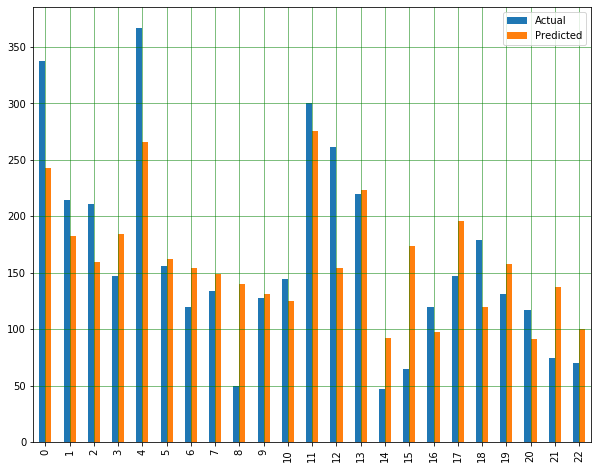

In [43]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 45.71192776785379
Mean Squared Error: 3172.882158141242
Root Mean Squared Error: 56.32834240541117


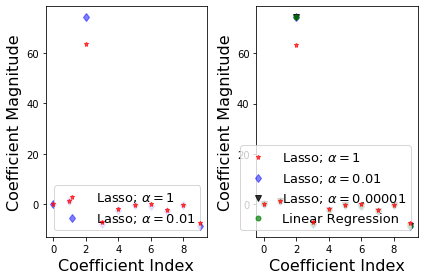

In [45]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(regressor.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()


In [46]:
alphas = 10**np.linspace(3,-10,100)*0.5
alphas

array([5.00000000e+02, 3.69536102e+02, 2.73113861e+02, 2.01850863e+02,
       1.49182362e+02, 1.10256537e+02, 8.14875417e+01, 6.02251770e+01,
       4.45107543e+01, 3.28966612e+01, 2.43130079e+01, 1.79690683e+01,
       1.32804389e+01, 9.81520325e+00, 7.25414389e+00, 5.36133611e+00,
       3.96241449e+00, 2.92851041e+00, 2.16438064e+00, 1.59963357e+00,
       1.18224471e+00, 8.73764200e-01, 6.45774833e-01, 4.77274228e-01,
       3.52740116e-01, 2.60700414e-01, 1.92676430e-01, 1.42401793e-01,
       1.05245207e-01, 7.77838072e-02, 5.74878498e-02, 4.24876718e-02,
       3.14014572e-02, 2.32079442e-02, 1.71523464e-02, 1.26768225e-02,
       9.36908711e-03, 6.92443186e-03, 5.11765511e-03, 3.78231664e-03,
       2.79540509e-03, 2.06600620e-03, 1.52692775e-03, 1.12850986e-03,
       8.34050269e-04, 6.16423370e-04, 4.55581378e-04, 3.36707533e-04,
       2.48851178e-04, 1.83918989e-04, 1.35929412e-04, 1.00461650e-04,
       7.42484131e-05, 5.48749383e-05, 4.05565415e-05, 2.99742125e-05,
      

Text(0, 0.5, 'weights')

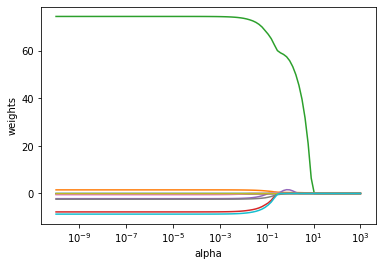

In [47]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [48]:
from sklearn.linear_model import LassoCV
import math

lassocv = LassoCV(alphas = None, cv = 4, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
err = mse(y_test, lasso.predict(X_test))
print("{}: {}\n{}: {}".format("MSE", err, "RMSE", math.sqrt(err)))
pd.Series(lasso.coef_, index=vals)

MSE: 3301.0726554034163
RMSE: 57.454961973735706


l_actual17     -0.000000
l_points17      0.364071
l_owners17     46.622225
l_passtd17      0.000000
l_passint17     0.000000
l_rushyds17     0.000000
l_rushtd17      0.000000
l_recepts17    -0.000000
l_recyds17     -0.000000
l_rectd17      -0.000000
dtype: float64

In [49]:
import resample
from resample.bootstrap import bootstrap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def fitreg(A):
    lassocv = LassoCV(alphas = None, cv = 4, max_iter = 100000, normalize = True)
    lassocv.fit(X_train, y_train)
    lasso.set_params(alpha=lassocv.alpha_)
    lasso.fit(X_train, y_train)
    err = mse(y_test, lasso.predict(X_test))
    return {"coef": lasso.coef_, "intercept": lasso.intercept_}

boot_coef = bootstrap(a=data, f=fitreg, b=5000)

In [50]:
print(boot_coef)

[{'coef': array([-0.        ,  0.36407079, 46.62222532,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ]), 'intercept': 96.05923844263027}
 {'coef': array([-0.        ,  0.36407079, 46.62222532,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ]), 'intercept': 96.05923844263027}
 {'coef': array([-0.        ,  0.36407079, 46.62222532,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ]), 'intercept': 96.05923844263027}
 ...
 {'coef': array([-0.        ,  0.36407079, 46.62222532,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ]), 'intercept': 96.05923844263027}
 {'coef': array([-0.        ,  0.36407079, 46.62222532,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ]), 'intercept': 96.05923844263027}
 {'coef': array([-0.        ,  0.36407079, 46.62222532,